In [2]:
import sys, os

In [3]:
os.listdir('data')

['benigns', 'callbacks', 'normals', 'cancers']

In [58]:
imagepaths = os.listdir('external/data/breast')
len(imagepaths)

10344

In [59]:
import cv2

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# samplesize = 16
samplesize = len(imagepaths)
samples = []

for ii in range(samplesize):
    if ii % 10 != 0: continue
    sys.stdout.write('%d\r' % ii)
    sys.stdout.flush()
    tryim = cv2.imread('external/data/breast/' + imagepaths[ii]).astype(np.float)
    samples.append(tryim)

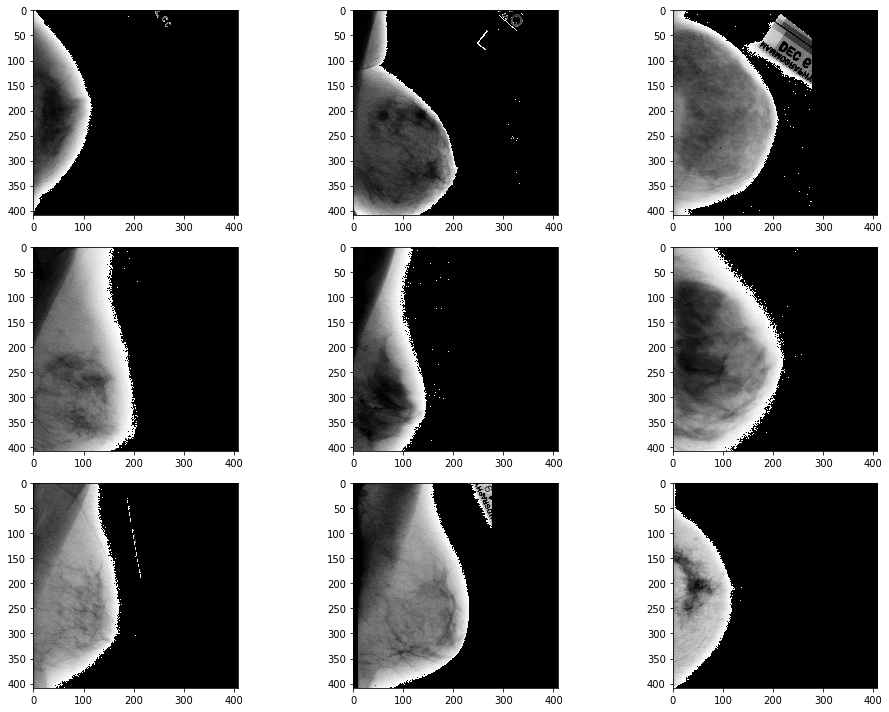

In [63]:
plt.figure(figsize=(14, 10))
for ii in range(9):
    plt.subplot(3, 3, ii + 1)
    plt.imshow(samples[ii])
plt.tight_layout()
plt.show()

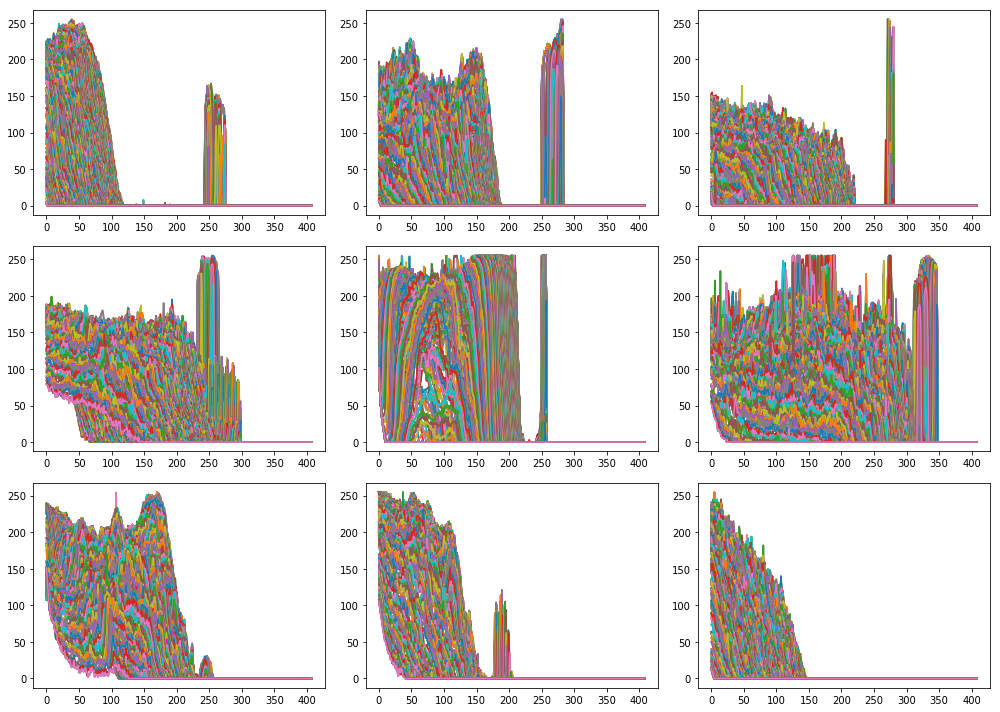

In [38]:
plt.figure(figsize=(14, 10))

for ii in range(9):
    plt.subplot(3, 3, ii + 1)
    for yy in range(len(samples[ii])):
        plt.plot(samples[ii][yy])
plt.tight_layout()
plt.show()

# def vertplot(img):
    
#     for yy in range(len(img)):
        

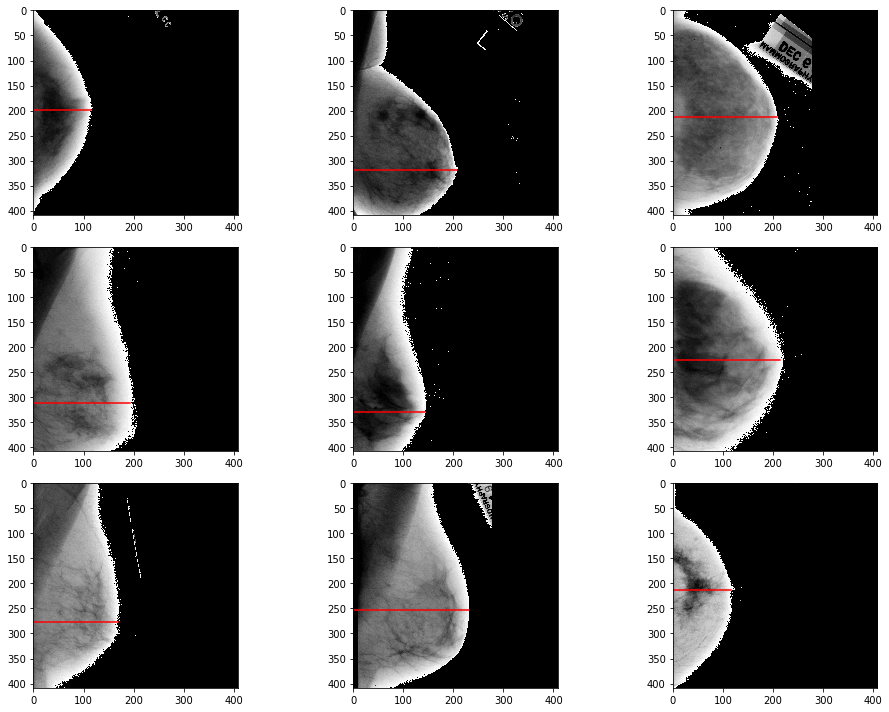

In [64]:
cutoffs = []
lowcut = 255 * 0.05
for ii in range(9):
    samp = samples[ii]
    maxy = 0
    ypos   = 0
    for yy in range(len(samp) - 1, 0, -1):
        miny = 0
        for xx in range(len(samp[yy])):
            if samp[yy, xx][0] < lowcut:
                miny = xx
                break
        if maxy < miny:
            maxy = miny
            ypos = yy
    cutoffs.append((ypos, maxy))
    
plt.figure(figsize=(14, 10))
for ii in range(9):
    plt.subplot(3, 3, ii + 1)
    plt.imshow(samples[ii])
    plt.plot([0, cutoffs[ii][1]], [cutoffs[ii][0], cutoffs[ii][0]], color='red')
plt.tight_layout()
plt.show()
        
        
        

In [65]:
cutoffs = []
lowcut = 255 * 0.05
for ii in range(len(samples)):
    samp = samples[ii]
    maxy = 0
    ypos   = 0
    for yy in range(len(samp) - 1, 0, -1):
        miny = 0
        for xx in range(len(samp[yy])):
            if samp[yy, xx][0] < lowcut:
                miny = xx
                break
        if maxy < miny:
            maxy = miny
            ypos = yy
    cutoffs.append((ypos, maxy))

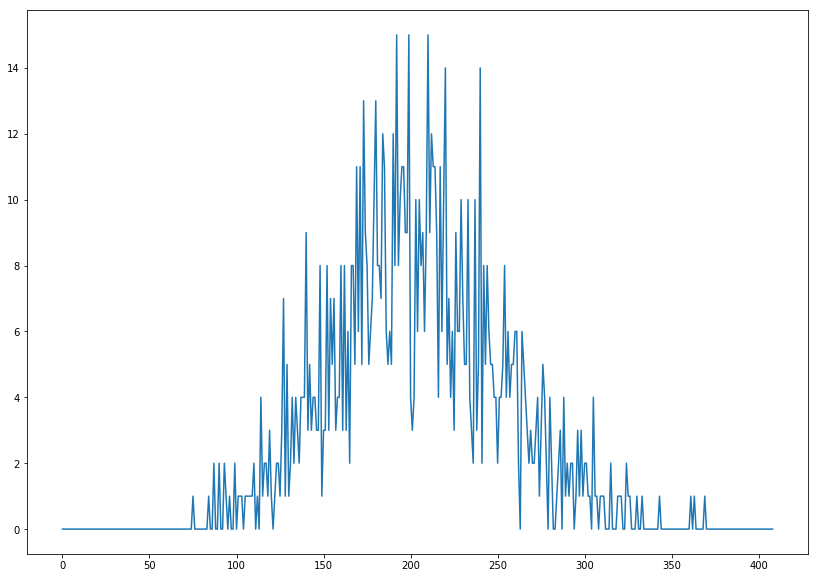

In [66]:
cutdistrib = np.zeros(samples[0].shape[1])
for _, maxy in cutoffs:
    cutdistrib[maxy] += 1
    
plt.figure(figsize=(14, 10))
plt.plot(cutdistrib)
plt.show()

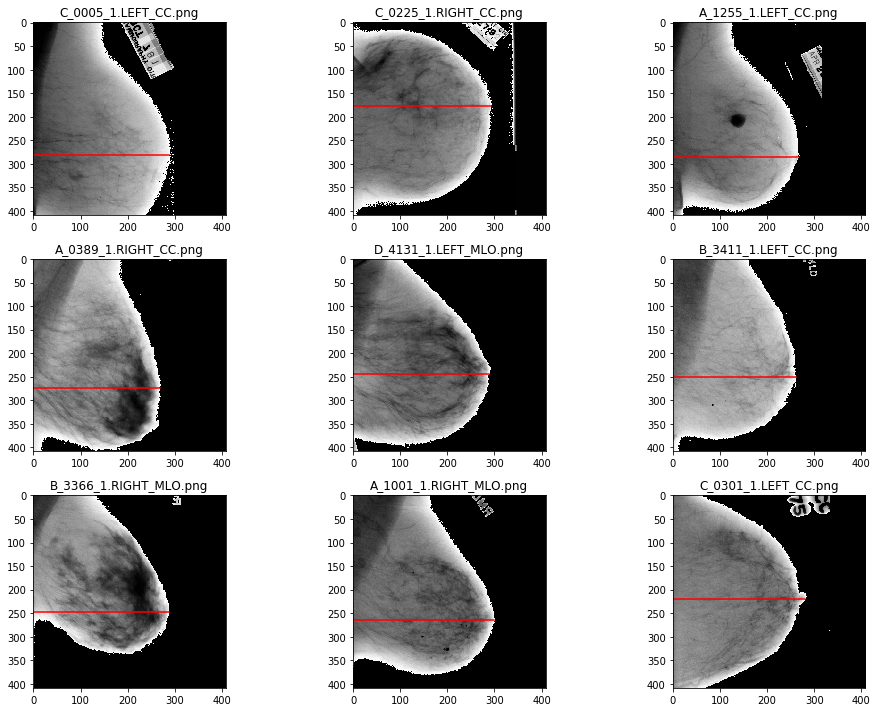

In [93]:
badcuts = []
for ii, (_, maxy) in enumerate(cutoffs):
    if maxy > 250 and maxy < 300:
        badcuts.append(ii)
        
plt.figure(figsize=(14, 10))
for ii in range(9):
    ax = plt.subplot(3, 3, ii + 1)
    ind = badcuts[ii]
    plt.imshow(samples[ind])
    ax.set_title(imagepaths[ii])
    plt.plot([0, cutoffs[ind][1]], [cutoffs[ind][0], cutoffs[ind][0]], color='red')
plt.tight_layout()
plt.show()

        
# cutoffs = []
# lowcut = 255 * 0.05
# for ii in range(len(samples)):
#     samp = samples[ii]
#     maxy = 0
#     ypos   = 0
#     for yy in range(len(samp) - 1, 0, -1):
#         miny = 0
#         for xx in range(len(samp[yy])):
#             if samp[yy, xx][0] < lowcut:
#                 miny = xx
#                 break
#         if maxy < miny:
#             maxy = miny
#             ypos = yy
#     cutoffs.append((ypos, maxy))

In [90]:
lowcut = 255 * 0.05

def bbox(img, size=200):
    maxy = 0
    ypos = 0
    for yy in range(len(img) - 1, 0, -1):
        miny = 0
        for xx in range(len(img[yy])):
            if img[yy, xx][0] < lowcut:
                miny = xx
                break
        if maxy < miny:
            maxy = miny
            ypos = yy
            
    x0 = maxy - size
    if x0 < 0: x0 = 0
    y0 = ypos - size / 2
    if y0 < 0: y0 = 0
    if y0 + size >= len(img): y0 -= (y0 + size - len(img))
        
    return x0, y0, x0 + size, y0 + size

boxes = []
# for ii in range(len(samples)):
for ii in range(9):
    samp = samples[ii]
    boxes.append(bbox(samp))

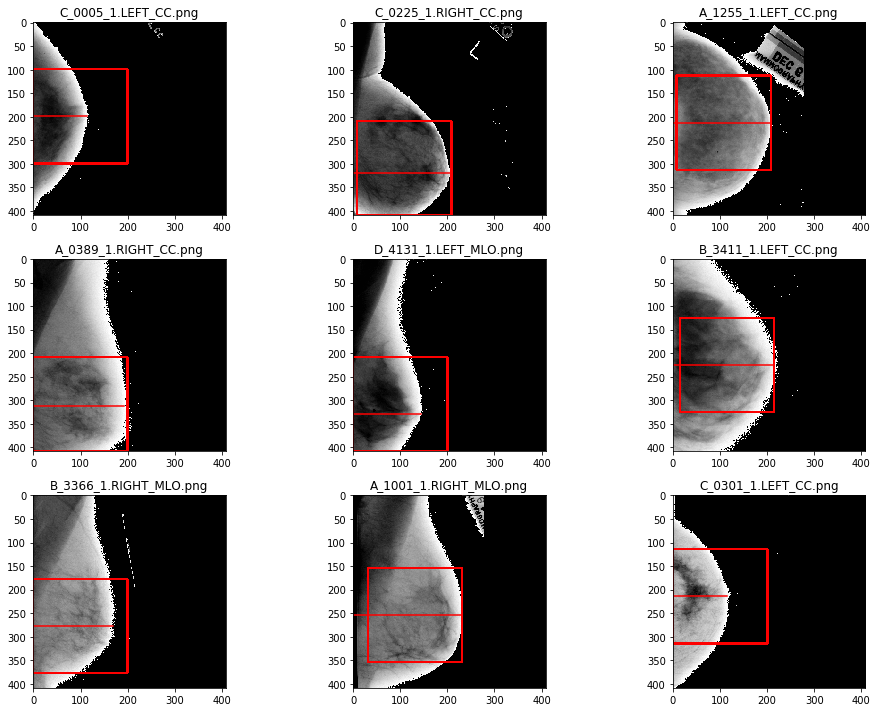

In [94]:

plt.figure(figsize=(14, 10))
for ii in range(9):
    ax = plt.subplot(3, 3, ii + 1)
    ax.set_title(imagepaths[ii])
#     ind = badcuts[ii]
    marked = samples[ii].copy()
    x0, y0, xf, yf = boxes[ii]
    marked = cv2.rectangle(marked, (x0, y0), (xf, yf), 3, 3)
    plt.imshow(marked)
#     assert cutoffs[]
    plt.plot([0, cutoffs[ii][1]], [cutoffs[ii][0], cutoffs[ii][0]], color='red')
plt.tight_layout()
plt.show()
